In [1]:
import sklearn

from sklearn import metrics
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris

data = load_iris()

In [22]:
df = pd.DataFrame({'sepal-length' : data['data'][:,0], 'sepal-width' : data['data'][:,1], 'petal-length' : data['data'][:,2], 'petal-width' : data['data'][:,3], 'class' : data['target']})

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df['class'] = df['class'].replace({ 0 : data['target_names'][0], 1: data['target_names'][1], 2:data['target_names'][2]})

In [24]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
df.shape

(150, 5)

In [26]:
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.7,2.5,5.8,1.8,virginica
1,5.1,3.8,1.6,0.2,setosa
2,6.3,3.3,6.0,2.5,virginica
3,5.5,2.3,4.0,1.3,versicolor
4,5.1,3.8,1.5,0.3,setosa


In [27]:
df.shape

(150, 5)

In [28]:
df['class'].unique()

array(['virginica', 'setosa', 'versicolor'], dtype=object)

In [29]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

df['class'] = label_encoding.fit_transform(df['class'].astype(str))

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.7,2.5,5.8,1.8,2
1,5.1,3.8,1.6,0.2,0
2,6.3,3.3,6.0,2.5,2
3,5.5,2.3,4.0,1.3,1
4,5.1,3.8,1.5,0.3,0


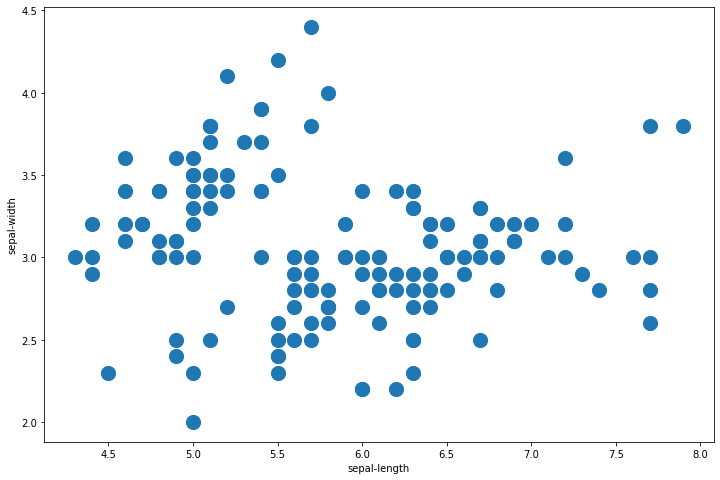

In [31]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(df['sepal-length'],df['sepal-width'],s=200)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

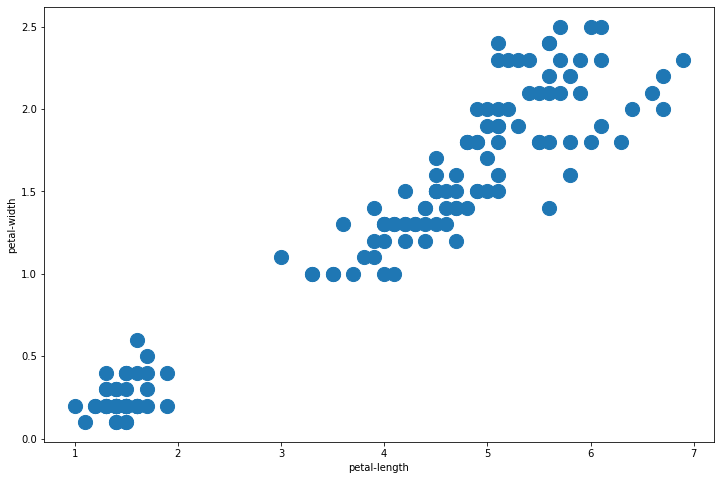

In [32]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(df['petal-length'],df['petal-width'],s=200)

plt.xlabel('petal-length')
plt.ylabel('petal-width')

plt.show()

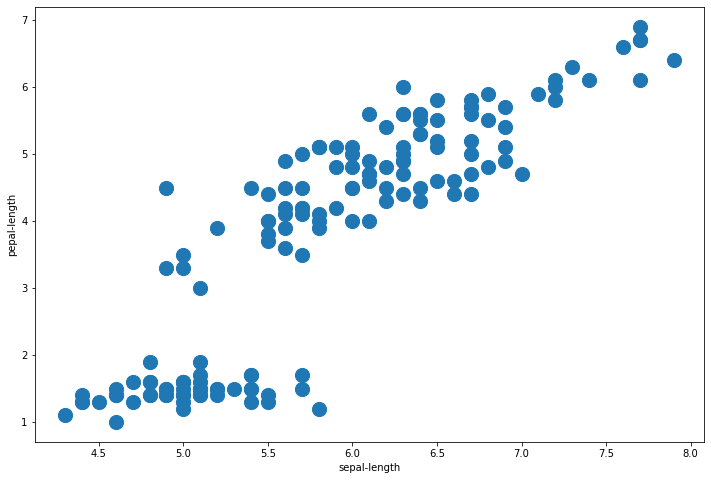

In [34]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(df['sepal-length'],df['petal-length'],s=200)

plt.xlabel('sepal-length')
plt.ylabel('pepal-length')

plt.show()

In [35]:
df_2D = df[['sepal-length','petal-length']]

df_2D.sample(5)

,sepal-length,petal-length
103,6.4,4.5
97,6.1,4.7
72,5.7,4.5
10,5.7,4.2
75,7.6,6.6


In [36]:
iris_2D = np.array(df_2D)

In [37]:
kmean_model = KMeans(n_clusters=3,max_iter=1000).fit(iris_2D)

In [38]:
kmean_model.labels_

array([2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0])

In [39]:
centroid = kmean_model.cluster_centers_

centroid

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49215686],
       [6.83902439, 5.67804878]])

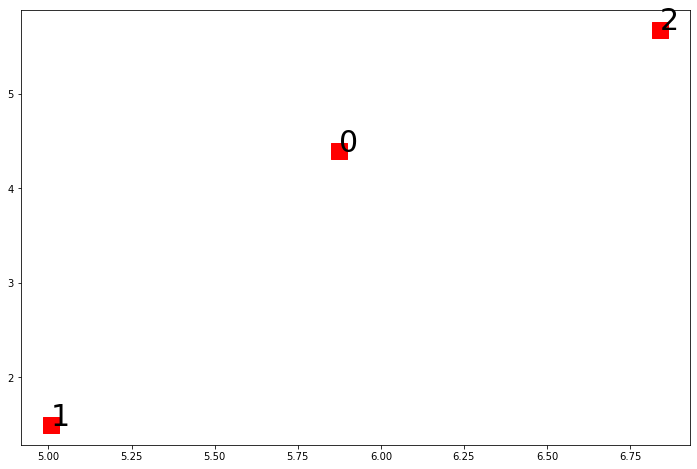

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(centroid[:,0],centroid[:,1],c='r',s=250,marker='s')

for i in range(len(centroid)):
    plt.annotate(i,(centroid[i][0], centroid[i][1]),fontsize=30)

plt.show()

In [46]:
labels = df['class']

In [49]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmean_model.labels_))

print('Completeness_score: ',metrics.completeness_score(labels,kmean_model.labels_))

print('v_measure_score: ',metrics.v_measure_score(labels,kmean_model.labels_))

print('AR_score: ',metrics.adjusted_rand_score(labels,kmean_model.labels_))

print('adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(labels,kmean_model.labels_))

print('silhouette_score: ',metrics.silhouette_score(df,kmean_model.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
AR_score:  0.6988627672348092
adjusted_mutual_info_score:  0.7028024531409133
silhouette_score:  0.5388007800309613


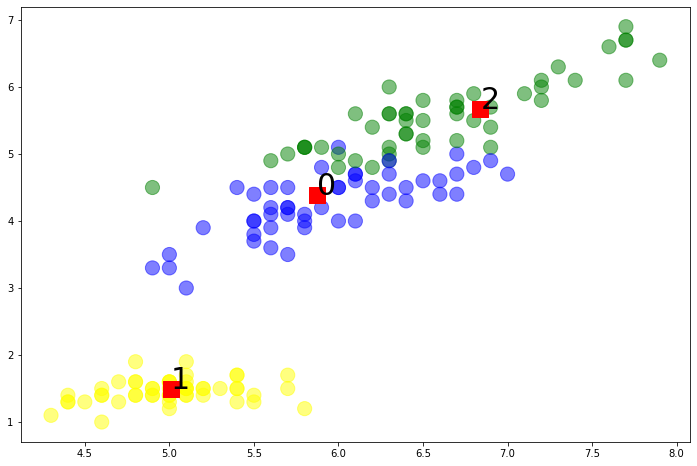

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['yellow','blue','green']

plt.scatter(df['sepal-length'],df['petal-length'],c=df['class'],cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5,s=200)

plt.scatter(centroid[:,0],centroid[:,1],c='r',s=250,marker='s')

for i in range(len(centroid)):
    plt.annotate(i,(centroid[i][0], centroid[i][1]),fontsize=30)

plt.show()

In [52]:
iris_features = df.drop('class',axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.7,2.5,5.8,1.8
1,5.1,3.8,1.6,0.2
2,6.3,3.3,6.0,2.5
3,5.5,2.3,4.0,1.3
4,5.1,3.8,1.5,0.3


In [53]:
iris_labels = df['class']

iris_labels.sample(5)

131    0
21     0
58     1
4      0
59     2
Name: class, dtype: int32

In [54]:
kmean_model = KMeans(n_clusters=3).fit(iris_features)

In [55]:
kmean_model.labels_

array([1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2])

In [56]:
kmean_model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [57]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmean_model.labels_))

print('Completeness_score: ',metrics.completeness_score(labels,kmean_model.labels_))

print('v_measure_score: ',metrics.v_measure_score(labels,kmean_model.labels_))

print('AR_score: ',metrics.adjusted_rand_score(labels,kmean_model.labels_))

print('adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(labels,kmean_model.labels_))

print('silhouette_score: ',metrics.silhouette_score(iris_features,kmean_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
AR_score:  0.7302382722834697
adjusted_mutual_info_score:  0.7551191675800483
silhouette_score:  0.5528190123564102
